In [179]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr, spearmanr
from tqdm import tqdm
import numpy as np 
import math
import seaborn as sns
from scipy.stats import ttest_ind


demos = ['women', 'black', 'hispanic', 'native american']
%matplotlib inline

In [171]:
trends = pd.read_csv('../../out/trends.csv', index_col=0)

unis = pd.read_csv('../../data/IPEDS/university_info/hd2021.csv', encoding='latin-1', index_col=0)

unis_stats = pd.merge(unis, trends, left_index=True, right_index=True)

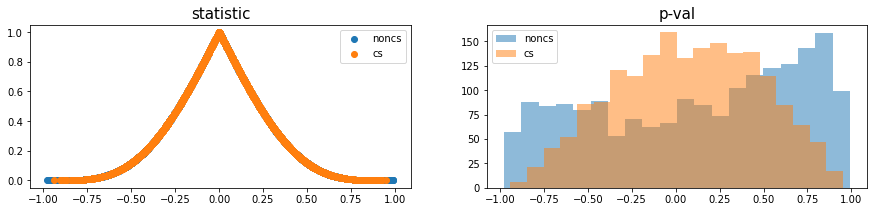

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3));

axs[0].scatter(trends['noncs_stat'], trends['noncs_pval'], label='noncs');
axs[0].scatter(trends['cs_stat'], trends['cs_pval'], label='cs');
axs[0].set_title('statistic', fontsize=15);
axs[0].legend();

axs[1].hist(trends['noncs_stat'], bins=20, alpha=0.5, label='noncs');
axs[1].hist(trends['cs_stat'], bins=20, alpha=0.5, label='cs');
axs[1].set_title('p-val', fontsize=15);
axs[1].legend();

In [173]:
unis_stats.groupby('STABBR').mean()[['cs_stat', 'cs_pval']].sort_values('cs_stat', ascending=False)

,cs_stat,cs_pval
STABBR,,
PR,0.652654,0.029491
SD,0.493442,0.257476
ND,0.424986,0.245139
ME,0.419048,0.252299
MN,0.376262,0.267876
NH,0.306440,0.375917
VT,0.266320,0.557646
UT,0.264699,0.444038
CT,0.253735,0.298656


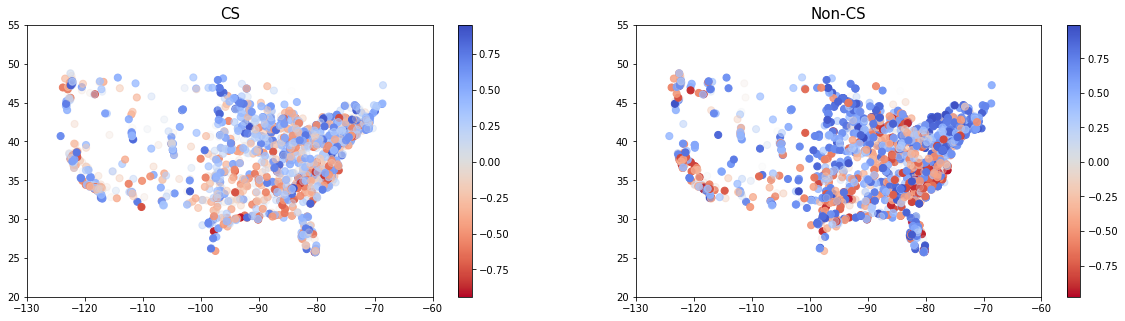

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
img = axs[0].scatter(unis_stats['LONGITUD'], unis_stats['LATITUDE'], c=unis_stats['cs_stat'], \
               cmap='coolwarm_r', alpha=1-abs(unis_stats['cs_pval']), s=50, facecolors='none');#, edgecolors='r');
axs[0].set_xlim(-130, -60)
axs[0].set_ylim(20, 55)
axs[0].set_title('CS', fontsize=15);
fig.colorbar(img, ax=axs[0]);

img = axs[1].scatter(unis_stats['LONGITUD'], unis_stats['LATITUDE'], c=unis_stats['noncs_stat'], \
               cmap='coolwarm_r', alpha=1-abs(unis_stats['noncs_pval']), s=50, facecolors='none');#, edgecolors='r');
axs[1].set_xlim(-130, -60)
axs[1].set_ylim(20, 55);
axs[1].set_title('Non-CS', fontsize=15);
fig.colorbar(img, ax=axs[1]);

(25.0, 50.0)

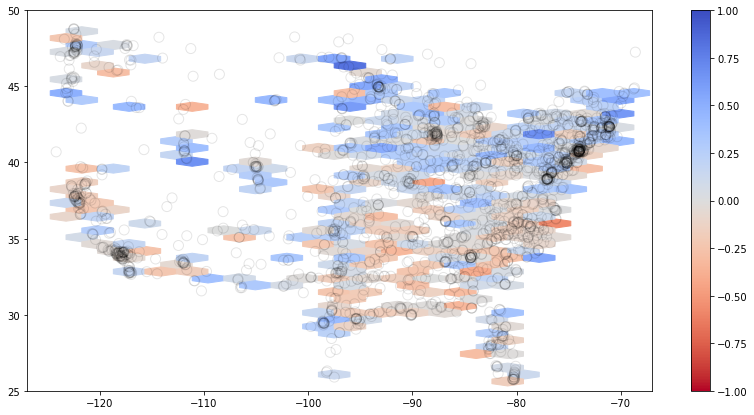

In [168]:
# from mpl_toolkits.basemap import Basemap

# m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
#             rsphere=(6378137.00,6356752.3142),\
#             resolution='l',area_thresh=1000.,projection='lcc',\
#             lat_1=50.,lon_0=-107.,ax=ax)

plt.figure(figsize=(14, 7))
plt.hexbin(unis_stats['LONGITUD'], unis_stats['LATITUDE'], cmap='coolwarm_r', \
           C=unis_stats['cs_stat'], gridsize=100, mincnt=1, alpha=1, vmin=-1, vmax=1);
plt.colorbar();
plt.scatter(unis_stats['LONGITUD'], unis_stats['LATITUDE'], cmap='coolwarm_r', \
            s=100, alpha=0.1, facecolors='none', edgecolors='black');
plt.xlim(-127, -67)
plt.ylim(25, 50)

In [81]:
unis_stats.sort_values('cs_stat', ascending=True)[['INSTNM', 'STABBR', 'cs_stat', 'cs_pval']].head(10)

,INSTNM,STABBR,cs_stat,cs_pval
UNITID,,,,
404994,ASA College,NY,-0.940528,0.000016
160579,SOWELA Technical Community College,LA,-0.907207,0.000115
133997,Florida Career College-Miami,FL,-0.899397,0.000164
223320,Coastal Bend College,TX,-0.884420,0.000300
199643,Shaw University,NC,-0.878188,0.000376
221838,Tennessee State University,TN,-0.867499,0.000541
169275,Mott Community College,MI,-0.843904,0.001091
146612,Lewis University,IL,-0.840584,0.001193
199999,Winston-Salem State University,NC,-0.838522,0.001260


/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

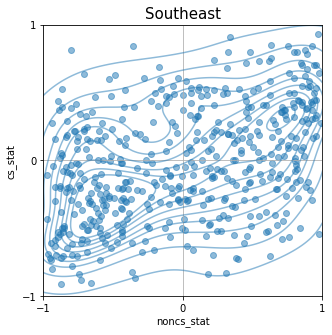

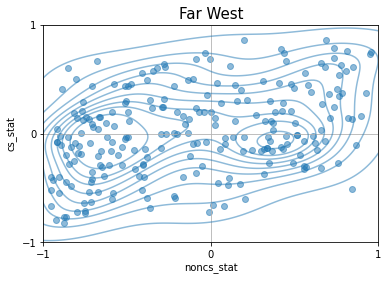

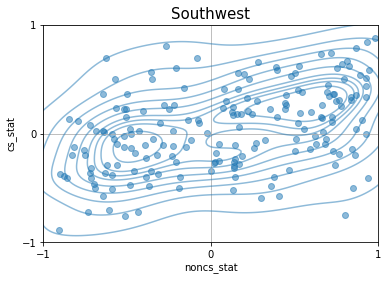

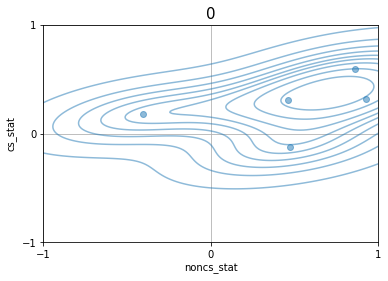

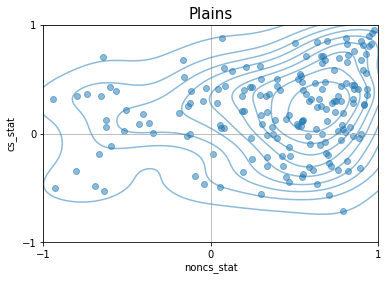

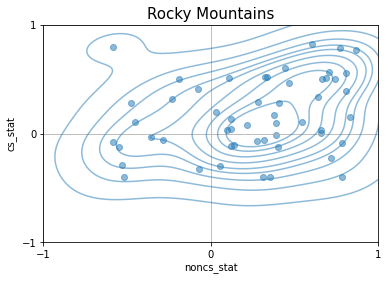

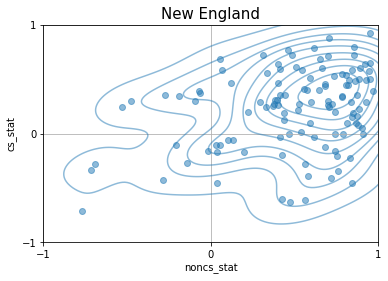

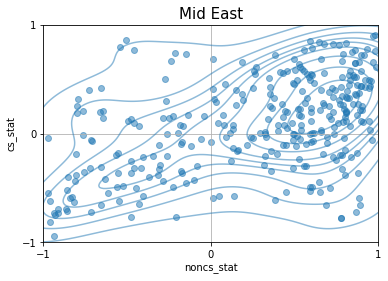

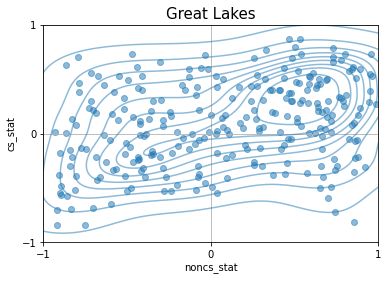

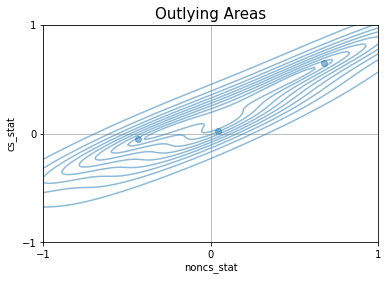

<Figure size 432x288 with 0 Axes>

In [178]:
plt.figure(figsize=(5, 5))
unis_stats['OBEREG'] = unis_stats['OBEREG'].replace({1: 'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6: 'Southwest', 7: 'Rocky Mountains', 8: 'Far West', 9: 'Outlying Areas'})

for reg in unis_stats['OBEREG'].unique():
    plt.scatter(unis_stats[unis_stats['OBEREG']==reg]['noncs_stat'], \
                unis_stats[unis_stats['OBEREG']==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    sns.kdeplot(unis_stats[unis_stats['OBEREG']==reg]['noncs_stat'], \
                unis_stats[unis_stats['OBEREG']==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    plt.title(reg, fontsize=15)
    plt.xticks([-1, 0, 1]);
    plt.yticks([-1, 0, 1]);
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid()
    plt.figure()
# sns.scatterplot(data=unis_stats, x='cs_stat', y='noncs_stat', hue='OBEREG', alpha=0.9);